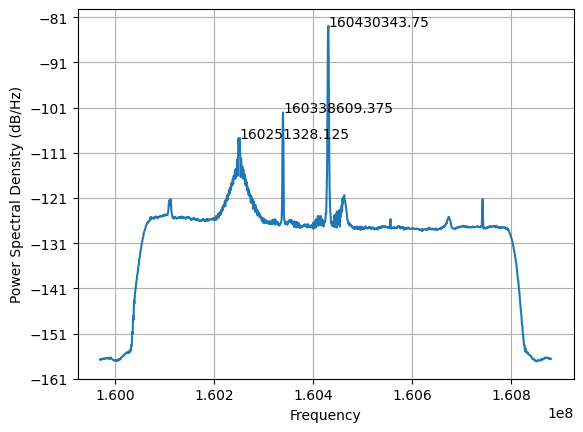

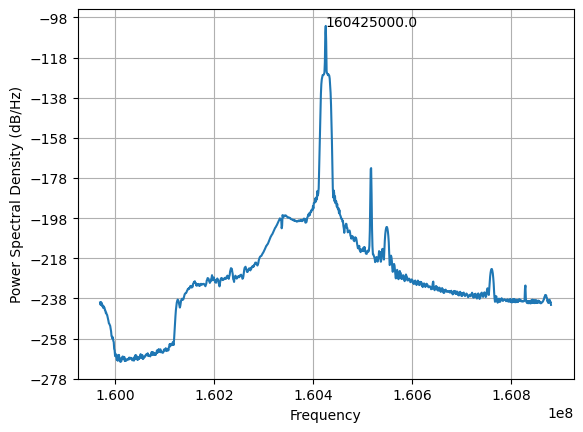

1.4124186038970947


In [8]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import time

samples = np.fromfile('../data/test_1ch.fc32', dtype=np.complex64)

sample_rate = 912000
center_freq = 160425000
x = samples
x = x[:2000000]

# PLOT THE PSD
fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=sample_rate, Fc=center_freq)
peaks = signal.find_peaks(psd[0], prominence=0.00000000001)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)))
plt.show()

t = np.arange(len(x))/sample_rate
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*86309)

start = time.time()

x = x * p
x = signal.convolve(x, h, 'same')
end = time.time()

# PLOT THE PSD
fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=sample_rate, Fc=center_freq)
peaks = signal.find_peaks(psd[0], prominence=0.00000000001)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)))
plt.show()

x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

print(end - start)

#x = 10 * np.log10(x)
#psd = plt.psd(x, NFFT=1024, Fs=sample_rate, Fc=center_freq)

sample_rate = sample_rate/100


